<img src="../images/cads-logo.png" style="height: 100px;" align=left> 
<img src="../images/sklearn-logo.png" style="height: 100px;" align=right>

# Validation Metrics


# Table of Contents

- [Evaluation for Classification](#Evaluation-for-Classification)
    - [Preamble](#Preamble)
    - [Support Vector Machine (SVM)](#Support-Vector-Machine-(SVM))
        - [Question:](#Question:)
    - [Baseline: Dummy (Majority) Classifier](#Baseline:-Dummy-(Majority)-Classifier)
    - [Question](#Question)
    - [Conclusion:](#Conclusion:)
- [Evaluation metrics for binary classification](#Evaluation-metrics-for-binary-classification)
    - [Exercise:](#Exercise:)
    - [Python can do it easier!](#Python-can-do-it-easier!)
    - [Exercise:](#Exercise:)
- [Python can do it even easier!](#Python-can-do-it-even-easier!)
- [Let's build and compare more models](#Let's-build-and-compare-more-models)
    - [Logistic Regression](#Logistic-Regression)
    - [Decision Tree](#Decision-Tree)
    - [SVM with a linear kernel](#SVM-with-a-linear-kernel)
- [Decision functions and Probability](#Decision-functions-and-Probability)
    - [Decision function and probability: Impact of Threshold](#Decision-function-and-probability:-Impact-of-Threshold)
    - [Precision-recall curves](#Precision-recall-curves)
    - [Exercise:](#Exercise:)
    - [ROC curve:  Receiver Operating Characteristic curve](#ROC-curve:--Receiver-Operating-Characteristic-curve)
    - [Exercise:](#Exercise:)
    - [Area-Under-Curve (AUC)](#-Area-Under-Curve-(AUC))
- [Evaluation measures for multi-class classification](#Evaluation-measures-for-multi-class-classification)
    - [Multi-class confusion matrix](#Multi-class-confusion-matrix)
    - [Multi-class classification report](#Multi-class-classification-report)
- [Conclusion](#Conclusion)
    - [References](#References)

## Evaluation for Classification


So far, we have evaluated classifiers using **accuracy**, the fraction of correct answers over the total numbers of elements. 

**Accuracy** is good because it is simple to understand. However, it has drawbacks.

We will see here what are the drawbacks of this metric and how to overcome them.

### Preamble

We will first create an imbalanced dataset, a data set where all classes are not equally represented. 

To do so, we transform the target in the digit dataset where the task consists in predicting the digit (0, 1, ..., 8 or 9) from on image, to a similar dataset where the target is whether the image represents a 1 or not. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (1797, 64)
Shape of y:  (1797,)


<img src='../images/Imagedigit.png'/>



In [3]:
from collections import Counter    
Counter(y)

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

In [4]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[:30])       # first 30 values
print('New binary labels:\t', y_binary_imbalanced[:30])

Original labels:	 [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [5]:
Counter(y_binary_imbalanced) # Negative class (0) is the most frequent class

Counter({0: 1615, 1: 182})

### Support Vector Machine (SVM)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)

# Accuracy of Support Vector Machine classifier
svm.score(X_test, y_test)

0.9955555555555555

#### Question: 
90% accuracy for this classifier, is it good or bad?

### Baseline: Dummy (Majority) Classifier
Let's compare with a baseline.

If we assume the majority class as prediction for all the datapoints then: 

$$Accuracy=\frac{|MajorityClass|}{|Total|}$$

In scikit-learn, DummyClassifier is a classifier class that generates very simple classifiers. It makes predictions using simple rules, which can be useful as a baseline for comparison against actual classifiers. 

In [7]:
from sklearn.dummy import DummyClassifier


dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)  # class 0 is most frequent
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

(y_dummy_predictions == 0).all()

True

### Question 
What is the accuracy of this classifier?

Hint: you can compute it manually or use `.score` method available on any scikit-learn classifier.

In [ ]:
### Your code here

In [8]:
# MC 
dummy_majority.score(X_test, y_test)

0.9044444444444445

### Conclusion:

Accuracy cannot precisely evaluate the prediction models. We need other metrics as well. 

# Evaluation metrics for binary classification


## Confusion matrix

<img src='../images/CM.png' style="height: 220px;"  align=left> <img src='../images/confusion1.png' style="height: 190px;" align=right>

##### TP or True_Positive: 
 The number of the datapoints in X_test where **y_test=1 and prediction=1**. 

##### TN or True_Negative: 
 The number of the datapoints in X_test where **y_test!=1 and prediction!=1**. 
 
##### FP or False_Positive: 
 The number of the datapoints in X_test where **y_test!=1 and prediction=1**. 
 
##### FN or False_Negative: 
 The number of the datapoints in X_test where **y_test=1 and prediction!=1**. 
 
 <img src='../images/TP_TN.png'  style="height: 450px;"/>

<img src='../images/ConfusionMatrix.png' style="height: 400px;"/>

#### Precision

**Proba($e\in C$ $|$ $e$ labeled $C$ )**
$$P=\frac{TP}{TP + FP}$$

#### Recall
**Proba($e$ labeled $C$ $|$ $e \in C$)**

$$R=\frac{TP}{TP + FN}$$

#### $F_1-score$ Harmonic mean of Precision and Recall:


$$F_1-score = 2 \frac{P \times R}{P + R}$$


#### Accuracy

$$ \frac{TP + TN }{TP + TN + FP + FN}$$

<img src='../images/PercisionRecall.png'  style="height: 450px;"/>

### Exercise:

Calculate TP, TN, FP, FN, Percision, Recall, F1, and Accuracy for the above SVM model. 

In [ ]:
###### Hint: You can use the following code:
svm_pred = svm.predict(X_test)
# svm_tp_logic = (y_test == ...) & (svm_pred == ...)
# svm_tp = np.sum(svm_tp_logic)
# print('SVM TP= ', svm_tp)

# ...

# svm_Accuracy = ((...)/(...))
# print('SVM Accuracy= ', svm_Accuracy)

# svm_Precison = (.../(...))
# print('SVM Precison= ', svm_Precison)

# svm_Recall = (.../(...))
# print('SVM Recall= ', svm_Recall)

# svm_F1 = ((...)/(...))
# print('SVM F1_score= ', svm_F1)

In [9]:
# MC
###### Hint: You can use the following code for TP and FP computation:
svm_pred=svm.predict(X_test)
svm_tp_logic=(y_test==1) & (svm_pred==1)
svm_tp=np.sum(svm_tp_logic)
print('SVM TP= ', svm_tp)

svm_fp_logic=(y_test!=1) & (svm_pred==1) 
svm_fp=np.sum(svm_fp_logic)
print('SVM FP= ', svm_fp)

svm_tn_logic=(y_test!=1) & (svm_pred!=1) 
svm_tn=np.sum(svm_tn_logic)
print('SVM TN= ', svm_tn)

svm_fn_logic=(y_test==1) & (svm_pred!=1)
svm_fn=np.sum(svm_fn_logic)
print('SVM FN= ', svm_fn)

svm_Accuracy=((svm_tp+svm_tn)/(svm_tp+svm_tn+svm_fp+svm_fn))
print('SVM Accuracy= ', svm_Accuracy)

svm_Precison=((svm_tp)/(svm_tp+svm_fp))
print('SVM Precison= ', svm_Precison)

svm_Recall=((svm_tp)/(svm_tp+svm_fn))
print('SVM Recall= ', svm_Recall)

svm_F1=((2*svm_Precison*svm_Recall)/(svm_Precison+svm_Recall))
print('SVM F1_score= ', svm_F1)

SVM TP=  41
SVM FP=  0
SVM TN=  407
SVM FN=  2
SVM Accuracy=  0.9955555555555555
SVM Precison=  1.0
SVM Recall=  0.9534883720930233
SVM F1_score=  0.9761904761904763


### Python can do it easier!

#### Attention: 
1. Python returns the confusion matrix in the following format: [ [TN  FP] [FN  TP] ]
2. Order of (y_test, svm_pred) in all the following functions matters.
<img src='../images/confusion1.png' style="height: 150px;" align=right>

In [10]:
from sklearn.metrics import confusion_matrix

confusion_svm=confusion_matrix(y_test, svm_pred) 

print('SVM classifier Confusion Matrix\n', confusion_svm)

print('**********************')

print('SVM TN= ', confusion_svm[0][0])

print('SVM FP=', confusion_svm[0][1])

print('SVM FN= ', confusion_svm[1][0])

print('SVM TP= ', confusion_svm[1][1])

print('**********************')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('SVM Precision= {:.2f}'.format(precision_score(y_test, svm_pred)))
print('SVM Recall= {:.2f}'.format(recall_score(y_test, svm_pred)))
print('SVM F1= {:.2f}'.format(f1_score(y_test, svm_pred)))
print('SVM Accuracy= {:.2f}'.format(accuracy_score(y_test, svm_pred)))

SVM classifier Confusion Matrix
 [[407   0]
 [  2  41]]
**********************
SVM TN=  407
SVM FP= 0
SVM FN=  2
SVM TP=  41
**********************
SVM Precision= 1.00
SVM Recall= 0.95
SVM F1= 0.98
SVM Accuracy= 1.00


### Exercise:
Calculate above metrics for DummyClassifier.

In [ ]:
confusion_majority = confusion_matrix(y_test, y_dummy_predictions)

# print('Mjority classifier Confusion Matrix\n', ...)

print('**********************')

# print('Mjority TN= ', ...)

# print('Mjority FP=', ...)

# print('Mjority FN= ', ...)

# print('Mjority TP= ', ...)

print('**********************')

# print('Mjority Precision= {:.2f}'.format(...))
# print('Mjority Recall= {:.2f}'. format(...))
# print('Mjority F1= {:.2f}'. format(...))
# print('Mjority Accuracy= {:.2f}'. format(...))

In [11]:
# MC
confusion_majority=confusion_matrix(y_test, y_dummy_predictions)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')

print('Mjority TN= ', confusion_majority[0][0])

print('Mjority FP=', confusion_majority[0][1])

print('Mjority FN= ', confusion_majority[1][0])

print('Mjority TP= ', confusion_majority[1][1])

print('**********************')

print('Mjority Precision= {:.2f}'.format(precision_score(y_test, y_dummy_predictions)))
print('Mjority Recall= {:.2f}'. format(recall_score(y_test, y_dummy_predictions)))
print('Mjority F1= {:.2f}'. format(f1_score(y_test, y_dummy_predictions)))
print('Mjority Accuracy= {:.2f}'. format(accuracy_score(y_test, y_dummy_predictions)))

Mjority classifier Confusion Matrix
 [[407   0]
 [ 43   0]]
**********************
Mjority TN=  407
Mjority FP= 0
Mjority FN=  43
Mjority TP=  0
**********************
Mjority Precision= 0.00
Mjority Recall= 0.00
Mjority F1= 0.00
Mjority Accuracy= 0.90


/Users/lalehasadzadehesfahani/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Python can do it even easier!

In [12]:
# Combined report with all above metrics SVM
from sklearn.metrics import classification_report

print(classification_report(y_test, svm_pred, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       1.00      1.00      1.00       407
           1       1.00      0.95      0.98        43

    accuracy                           1.00       450
   macro avg       1.00      0.98      0.99       450
weighted avg       1.00      1.00      1.00       450



In [14]:
weighted_avg_recall=(407/450)*1+(43/450)*0.95 
avg_recall=(1+0.95)/2
weighted_avg_recall, avg_recall

(0.9952222222222222, 0.975)

In [15]:
# Combined report with all above metrics Majority

print(classification_report(y_test, y_dummy_predictions, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.90      1.00      0.95       407
           1       0.00      0.00      0.00        43

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.82      0.90      0.86       450



/Users/lalehasadzadehesfahani/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Let's build and compare more models

### Logistic Regression


In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)

lr_predicted = lr.predict(X_test)
lr_confusion =confusion_matrix(y_test, lr_predicted)
print('Logistic regression classifier confusion matrix (default settings)\n', lr_confusion)
print('**************************************\n')
print('Logistic regression classification report\n', 
   classification_report(y_test, lr_predicted, target_names=['not 1', '1']))

Logistic regression classifier confusion matrix (default settings)
 [[401   6]
 [  8  35]]
**************************************

Logistic regression classification report
               precision    recall  f1-score   support

       not 1       0.98      0.99      0.98       407
           1       0.85      0.81      0.83        43

    accuracy                           0.97       450
   macro avg       0.92      0.90      0.91       450
weighted avg       0.97      0.97      0.97       450



/Users/lalehasadzadehesfahani/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

tree_predicted = dt.predict(X_test)
dt_confusion = confusion_matrix(y_test,tree_predicted)
print('Decision tree classifier confusion matrix (max_depth = 2)\n', dt_confusion)
print('**************************************\n')
print('Decision tree classification report\n', 
      classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

Decision tree classifier confusion matrix (max_depth = 2)
 [[400   7]
 [ 17  26]]
**************************************

Decision tree classification report
               precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



### SVM with a linear kernel

In [18]:
lsvm = SVC(kernel='linear', C=1).fit(X_train, y_train)

lsvm_predicted = lsvm.predict(X_test)
lsvm_confusion = confusion_matrix(y_test, lsvm_predicted)
print('Support vector machine classifier confusion matrix (linear kernel, C=1)\n', 
      lsvm_confusion)
print('**************************************\n')
print('SVM, kernel linear, C=1 classification report \n', 
     classification_report(y_test, lsvm_predicted, target_names=['not 1', '1']))

Support vector machine classifier confusion matrix (linear kernel, C=1)
 [[402   5]
 [  5  38]]
**************************************

SVM, kernel linear, C=1 classification report 
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450



## Decision functions and Probability 

Many classifiers can provide information about the uncertainty associated with a particular prediction either by using the **decision function method** or the **predict proba method**. 

<img src='../images/ProbThreshold.png' style="height: 450px;"/>

Use the next block of code to retrive the value of the Decision function at each datapoint in X_test for Logistic Regression model.

In [19]:
lr = LogisticRegression()
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)   
lr_pred = lr.predict(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20], lr_pred[0:20]))   # first 20 instances

# show the decision_function scores for first 20 instances
y_score_list

/Users/lalehasadzadehesfahani/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0, -29.828762207932815, 0),
 (0, -19.382727621336986, 0),
 (0, -29.198820874352194, 0),
 (0, -21.746504242180798, 0),
 (0, -22.64233214904812, 0),
 (0, -11.805767442761343, 0),
 (1, 6.495989236649673, 1),
 (0, -23.35472565832361, 0),
 (0, -27.544573401947684, 0),
 (0, -26.88819804656229, 0),
 (0, -31.863521315442195, 0),
 (0, -22.485982080119168, 0),
 (0, -25.31808656057803, 0),
 (0, -13.38442782575408, 0),
 (0, -13.565713557905486, 0),
 (0, -13.308245916770716, 0),
 (1, 12.18125603411113, 1),
 (0, -34.36230264698582, 0),
 (0, -13.231624565680246, 0),
 (0, -29.594079707778068, 0)]

The following lines of code return the proba list for the Logistic Regression model.

In [20]:
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_pred_lr=lr.predict(X_test)

y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1], y_pred_lr[0:20]))  

# show the probability of positive class for first 20 instances
y_proba_list

/Users/lalehasadzadehesfahani/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0, 1.1105373541139766e-13, 0),
 (0, 3.821099512835149e-09, 0),
 (0, 2.0850343596641162e-13, 0),
 (0, 3.5942907629067336e-10, 0),
 (0, 1.4674391117905854e-10, 0),
 (0, 7.461344708707034e-06, 0),
 (1, 0.9984927938590912, 1),
 (0, 7.197331731864417e-11, 0),
 (0, 1.0902943590745042e-12, 0),
 (0, 2.101860845709823e-12, 0),
 (0, 1.4516052114241377e-14, 0),
 (0, 1.715781822041153e-10, 0),
 (0, 1.0104032032683398e-11, 0),
 (0, 1.538920494900194e-06, 0),
 (0, 1.2837631380086253e-06, 0),
 (0, 1.6607394922844349e-06, 0),
 (1, 0.9999948743907386, 1),
 (0, 1.1930031075412887e-15, 0),
 (0, 1.792989250405847e-06, 0),
 (0, 1.4042825069578528e-13, 0)]

In [21]:
Y_pred_newt = (y_proba_lr[:,1]>=0.3).astype(int)
Y_pred_newt

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Decision function and probability: Impact of Threshold

What is the impact of threshold on the predections?

<img src='../images/Threshold.png'  style="height: 400px;"/>

<img src='../images/PRThreshold.png' style="height: 250px;"/>

## Precision-recall curves


As discussed above, changing the threshold for the predicted probability has an effect on the performance of the algorithm. A good way to illustrate a trade-off between precision and recall is with the precision-recall curve by using `precision_recall_curve` from `sklearn.metrics`.

<img src='../images/PRCurve.png'  style="height: 250px;"/>

**Precision-Recall Curves are very widely used evaluation method for machine learning**.

Each point in the plot corresponds to a different threshold. Threshold equal to 0 implies that the recall is 1, whereas threshold equal to 1 implies that the recall is 0.

With the precision-recall curve, **the closer it is to the top-right corner**, the better the algorithm. And hence a larger area under the curve (AUC) indicates that the algorithm has higher recall and higher precision.


#### Question
Where  would be an **ideal classifier**?

<ipython-input-23-ebd489bed2ee>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


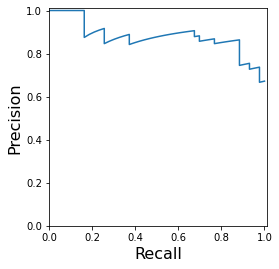

In [23]:
from sklearn.metrics import precision_recall_curve

lr_precision, lr_recall, lr_thresholds = precision_recall_curve(y_test, 
                                                            y_scores_lr)

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(lr_recall, lr_precision, label='Precision-Recall Curve')
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

### Exercise:
Copmare precision-recall curves for three models: Logistic Regression K-Nearest Neighbors and SVM with linear kernel classifier. Which one is better?

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression()
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)


knn = KNeighborsClassifier(n_neighbors = 10)
y_proba_knn = knn.fit(X_train, y_train).predict_proba(X_test)

lsvm = SVC(kernel='linear', C=1).fit(X_train, y_train)
# y_scores_lsvm = ...


# lr_precision, lr_recall, lr_thresholds = ...
# knn_precision, knn_recall, knn_thresholds = ...
# lsvm_precision, lsvm_recall, lsvm_thresholds = ...


plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
# plt.plot(... , ..., lw=1,  label='LogReg: Precision-Recall Curve', color='red')
# plt.plot(..., ..., lw=1, label='KNeighbors: Precision-Recall Curve', color='blue')
# plt.plot(..., ..., lw=1, label='SVM: Precision-Recall Curve', color='green')
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.legend(loc='lower left', fontsize=10)
plt.axes().set_aspect('equal')
plt.show()

/Users/lalehasadzadehesfahani/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-24-c12144b260eb>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


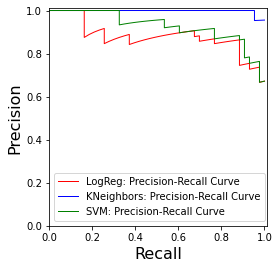

In [24]:
# MC
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression()
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)

knn = KNeighborsClassifier(n_neighbors = 10)
y_proba_knn = knn.fit(X_train, y_train).predict_proba(X_test)

lsvm = SVC(kernel='linear', C=1).fit(X_train, y_train)
y_scores_lsvm = lsvm.fit(X_train, y_train).decision_function(X_test)


lr_precision, lr_recall, lr_thresholds = precision_recall_curve(y_test, y_scores_lr)
knn_precision, knn_recall, knn_thresholds = precision_recall_curve(y_test, y_proba_knn[:,1])
lsvm_precision, lsvm_recall, lsvm_thresholds = precision_recall_curve(y_test, y_scores_lsvm)


plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(lr_recall, lr_precision, lw=1,  label='LogReg: Precision-Recall Curve', color='red')
plt.plot(knn_recall, knn_precision, lw=1, label='KNeighbors: Precision-Recall Curve', color='blue')
plt.plot(lsvm_recall, lsvm_precision, lw=1, label='SVM: Precision-Recall Curve', color='green')
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.legend(loc='lower left', fontsize=10)
plt.axes().set_aspect('equal')
plt.show()

## ROC curve:  Receiver Operating Characteristic curve


ROC curves or Receiver Operating Characteristic curves **illustrate the performance of a binary classifier**. 
It is created by plotting the true positive rate (TPR) (or recall) against the false positive rate (FPR).

ROC curves on the **X-axis** show a classifier's **False Positive Rate** so that would go from 0 to 1.0, and on the **Y-axis** they show a classifier's **True Positive Rate** so that will also go from 0 to 1.0.

ROC curves are very help with understanding the balance between true-positive rate and false positive rate.

<img src='../images/roc_Curve.png' style="height: 400px;"/>

So curves in **ROC space represent different tradeoffs as the decision threshold**, is varied for the classifier. So just as in the precision recall case, as we vary decision threshold, we'll get different numbers of false positives and true positives that we can plot on a chart.

Scikit learn has built a function for ROC curve called `roc_curve`. The inputs to this function (roc_curve) is the actual labels and the predicted probabilities (not the predicted labels).

#### Question
Where  would be an **ideal classifier**?

<ipython-input-25-1442ba03aef1>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


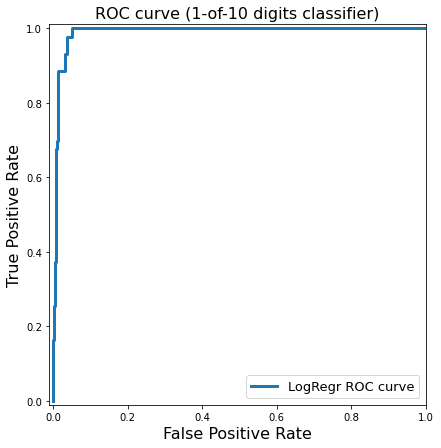

In [25]:
from sklearn.metrics import roc_curve, auc

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)

plt.figure(figsize=(7,7))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.axes().set_aspect('equal')
plt.show()

### Exercise:
Copmare ROC curves for three models: Logistic Regression K-Nearest Neighbors and SVM with linear kernel classifier. Which one is better?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression()
# y_scores_lr = lr.fit(..., ...).decision_function(...)

knn = KNeighborsClassifier(n_neighbors = 10)
# y_proba_knn = knn.fit(..., ...).predict_proba(...)

lsvm = SVC(kernel='linear', C=1).fit(X_train, y_train)
# y_scores_lsvm = lsvm.fit(..., ...).decision_function(...)


# fpr_lr, tpr_lr, _ = ...
# fpr_knn, tpr_knn, _ = ...
# fpr_lsvm, tpr_lsvm, _ = ...


plt.figure(figsize=(7,7))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
# plt.plot(..., ..., lw=1, label='LogRegr: ROC curve', color='red')
# plt.plot(..., ..., lw=1, label='KNeighbors: ROC curve', color='blue')
# plt.plot(..., ..., lw=1, label='SVM: ROC curve', color='green')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.axes().set_aspect('equal')
plt.show()

/Users/lalehasadzadehesfahani/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-26-2e288b347169>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


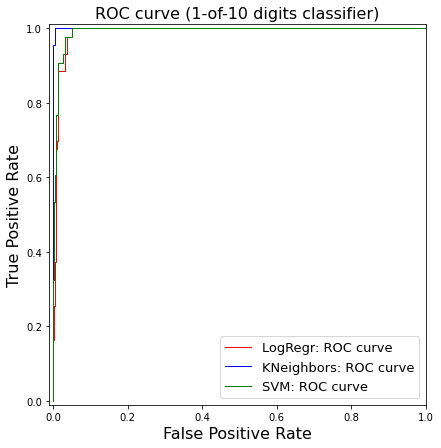

In [26]:
# MC
lr = LogisticRegression()
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)

knn = KNeighborsClassifier(n_neighbors = 10)
y_proba_knn = knn.fit(X_train, y_train).predict_proba(X_test)

lsvm = SVC(kernel='linear', C=1).fit(X_train, y_train)
y_scores_lsvm = lsvm.fit(X_train, y_train).decision_function(X_test)


fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)        
# y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
# fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr[:,1])

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn[:,1])
fpr_lsvm, tpr_lsvm, _ = roc_curve(y_test, y_scores_lsvm)

plt.figure(figsize=(7,7))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])

plt.plot(fpr_lr, tpr_lr, lw=1, label='LogRegr: ROC curve', color='red')
plt.plot(fpr_knn, tpr_knn, lw=1, label='KNeighbors: ROC curve', color='blue')
plt.plot(fpr_lsvm, tpr_lsvm, lw=1, label='SVM: ROC curve', color='green')

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.axes().set_aspect('equal')
plt.show()

##  Area-Under-Curve (AUC)

What can be a good indicator to compare two classifiers?

The area under the ROC curve (usually denoted by AUC) is a good measure of the performance of the classification algorithm. If it is near 0.5, the classifier is not much better than random guessing, whereas it gets better as the area gets **close to 1**. In the other words, the more the AUC, the better the model.

We can obtain the AUC by importing roc_auc_score from sklearn.metrics. The inputs to this function is the actual labels and the predicted probabilities (not the predicted labels).


#### Questions
    What is the maximum possible value?


In [27]:
# auc means area under the curve
auc(fpr_lr, tpr_lr)

0.9897720130278269

In [28]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_scores_lr)    # roc_auc_score(y_test, y_pred_proba) or  roc_auc_score(y_test, y_scores)
# roc_auc_score(y_test, y_proba_lr[:,1]) 

0.9897720130278269

In [29]:
roc_auc_score(y_test, y_proba_knn[:,1])

0.9997714416319067

In [30]:
roc_auc_score(y_test, y_scores_lsvm)

0.9928575509970858

The AUC is indeed quite close to 1, and so our classifier is very good at minimizing false negatives.

## Evaluation measures for multi-class classification

In many respects, **multi-class evaluation is a straightforward extension of the methods we use in binary evaluation**.



### Multi-class confusion matrix

 **True class matches the predicted class are all along the diagonal and misclassifications are off the diagonal**.
  <img src='../images/confusion_mc.png' style="height: 350px;">

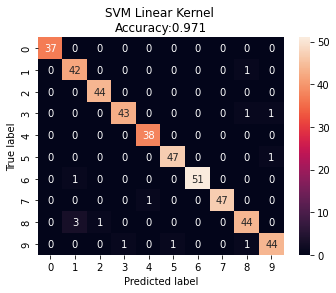

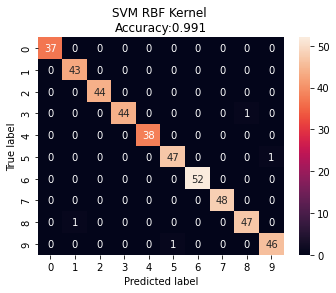

In [31]:
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


lin_svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
lin_svm_predicted_mc = lin_svm.predict(X_test_mc)
lin_confusion_mc = confusion_matrix(y_test_mc, lin_svm_predicted_mc)
df_cm = pd.DataFrame(lin_confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       lin_svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

# SVM with Radial Basis Function (RBF) 
svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

### Multi-class classification report

In [32]:
print('\n Classification report for SVM with Linear Kernel\n\n\n',
      classification_report(y_test_mc, lin_svm_predicted_mc))     # (y_true, y_pred)


 Classification report for SVM with Linear Kernel


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.98      0.94        43
           2       0.98      1.00      0.99        44
           3       0.98      0.96      0.97        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      0.98      0.99        52
           7       1.00      0.98      0.99        48
           8       0.94      0.92      0.93        48
           9       0.96      0.94      0.95        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [33]:
print('\n Classification report for SVM with Radial Basis Function (RBF) Kernel\n\n\n', 
      classification_report(y_test_mc, svm_predicted_mc))


 Classification report for SVM with Radial Basis Function (RBF) Kernel


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



## Conclusion

Simple accuracy may not often be the right goal for your particular machine learning application. For example with tumor detection or credit card fraud, false positives and false negatives might have very different real world effects for users or for organization outcomes. **So, it's important to select an evaluation metric that reflects those user application or business needs**. 

**Accuracy only gives a partial picture of a classifier's performance**

You are now more familiar with the motivation and definition of important alternative evaluation methods and metrics of machine learning like confusion matrices, precision recall, F 1 score and area under the ROC curve.


### References

- Cousera course 'Applied Machine Learning in Python Applied Machine Learning in Python, University of Michigan'.
- https://towardsdatascience.com/making-a-handwritten-digit-recogniser-program-using-nearest-neighbour-classifier-d33e76aa17b6

### Related Video
- https://www.coursera.org/lecture/ml-classification/precision-recall-curve-rENu8